# Identify the riskiest poor air quality days:
To identify the riskiest poor air quality days, time-series analysis can be performed on the AQI (Air Quality Index) values provided in the dataset. The AQI values can be plotted against time, and the days with the highest AQI values can be identified.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('processed.csv')

In [2]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the mean AQI for each day
daily_mean_aqi = df.groupby(pd.Grouper(key='Date', freq='D')).mean()['AQI']


Text(0, 0.5, 'AQI')

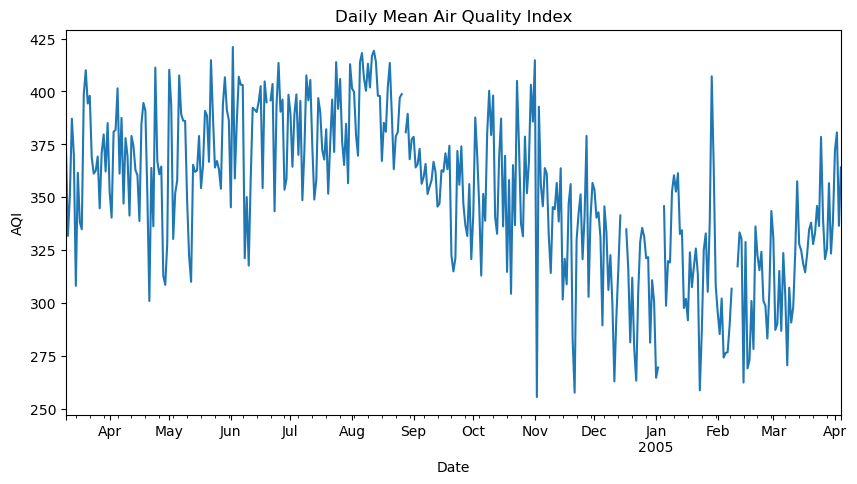

In [3]:
# Plot the daily mean AQI values over time
daily_mean_aqi.plot(figsize=(10,5))
plt.title('Daily Mean Air Quality Index')
plt.xlabel('Date')
plt.ylabel('AQI')

In [4]:
# Identify the days with the highest AQI values
riskiest_days = daily_mean_aqi.nlargest(5).index
print('The riskiest poor air quality days are:', riskiest_days)

The riskiest poor air quality days are: DatetimeIndex(['2004-06-02', '2004-08-12', '2004-08-06', '2004-08-11',
               '2004-05-22'],
              dtype='datetime64[ns]', name='Date', freq=None)


The results shows that 2005 has good air quality than 2004. The AQI values can also be compared with the national or regional air quality standards to understand the severity of the poor air quality days.

# Analyze the factors contributing to high AQI values:
To analyze the factors contributing to high AQI values, the correlations between AQI and the pollutant concentrations can be analyzed.

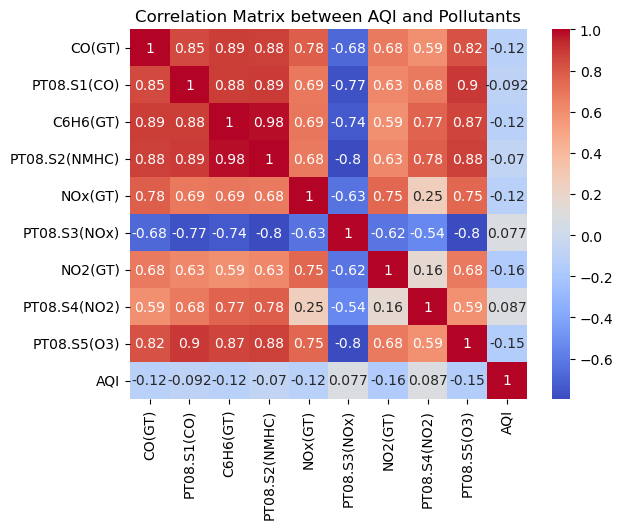

In [5]:
# Calculate the correlation matrix between AQI and other pollutants
corr_matrix = df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AQI']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix between AQI and Pollutants')
plt.show()

The heatmap shows the correlation coefficients between AQI and other pollutants, with red indicating positive correlation and blue indicating negative correlation. The numbers inside the boxes represent the correlation coefficients. This analysis can help identify the pollutants that have the strongest impact on air quality and prioritize the reduction of their emissions.

# Identify the sources of air pollution:
The dataset provides the concentrations of various pollutants such as CO(GT), C6H6(GT), NOx(GT), and NO2(GT) at different times. These pollutants can be emitted from various sources such as vehicles, industries, and burning of fossil fuels. To identify the sources of air pollution, the dataset can be analyzed to understand the variations in pollutant concentrations with respect to time.

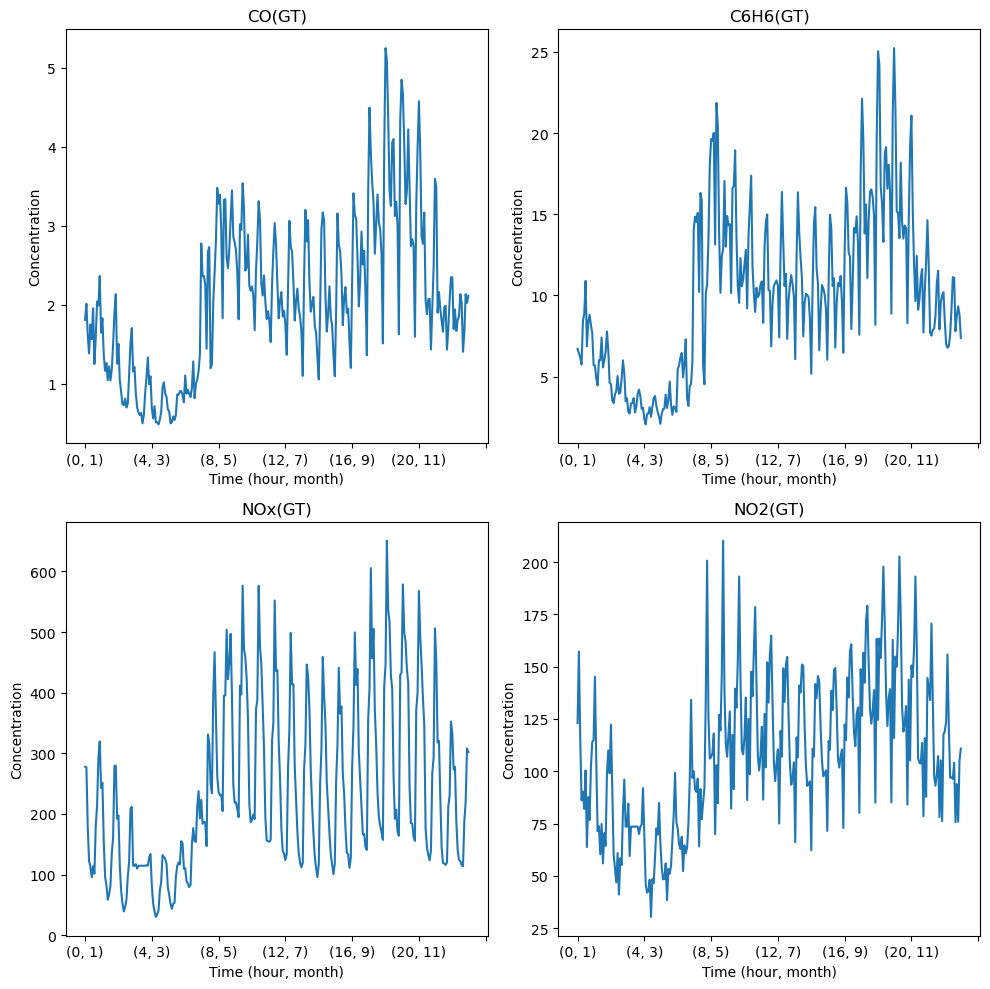

In [6]:
# Create a new dataframe with pollutant concentrations and time
pollutants = df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'Hour', 'Month']]

# Group the pollutant concentrations by hour and month
pollutants_grouped = pollutants.groupby(['Hour', 'Month']).mean()

# Plot the variations in pollutant concentrations with respect to time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(pollutants.columns[:-2]):
    ax = pollutants_grouped[col].plot(ax=axes[i])
    ax.set_xlabel('Time (hour, month)')
    ax.set_ylabel('Concentration')
    ax.set_title(col)

plt.tight_layout()
plt.show()


The resulting plots show the variations in pollutant concentrations with respect to time, which can help identify the sources of air pollution. For example, the concentrations of CO(GT) and NOx(GT) are higher during rush hours like 10:00 a.m. and 18:00 p.m., it suggests that vehicle emissions are a significant source of air pollution. Similarly, if the concentrations of C6H6(GT) and NO2(GT) are higher during the night, it suggests that the burning of fossil fuels for heating purposes is a significant source of air pollution.